# Reservoir Computing and Mackey-Glass prediction

This notebook is an example of Mackey-Glass prediction using Reservoir Computing, towards an optical implementation.

## Initialization

In [33]:
import numpy as np
import time

from reservoir import Reservoir
import data1D

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Data generation

In [75]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=4)

## Reservoir initialization

In [76]:
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=2, 
              future_pred=True, pred_horizon=10, rec_pred_steps=5,
              train_method='ridge', train_param=1e1
              )

## Reservoir Training

In [77]:
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.007683277130126953s
100%|██████████| 10000/10000 [00:01<00:00, 8633.71it/s]
Iterations finished. Elapsed time: 1552484877.8545415s
Training finished. Elapsed time: 0.23331499099731445s
Training score: 0.9936633602505679


## Reservoir Validation

In [78]:
input_data = data1D.mackey_glass(sequence_length=3000, n_sequence=2)

In [79]:
pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.00022840499877929688
100%|██████████| 3000/3000 [00:00<00:00, 8740.35it/s]
Iterations finished. Elapsed time: 1552484880.049202
Testing finished. Elapsed time: 0.008737564086914062
Testing score: 0.9913867477949322


# Score for predictions far in the future

In [81]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
b = Reservoir(n_res=400, res_encoding=None, 
              input_scale=2, input_encoding=None, 
              random_projection='simulation', weights_type='gaussian', 
              activation_fun='tanh', 
              parallel_runs=1, 
              future_pred=True, pred_horizon=2000, rec_pred_steps=5,
              train_method='ridge', train_param=1e1
              )
b.fit(input_data);

Start of training...
Initialization finished. Elapsed time: 0.22910428047180176s
100%|██████████| 10000/10000 [00:00<00:00, 18935.81it/s]
Iterations finished. Elapsed time: 0.5299429893493652s
Training finished. Elapsed time: 2.4160633087158203s
Training score: 0.18076665840508632


In [83]:
input_data = data1D.mackey_glass(sequence_length=10000, n_sequence=1)
pred_output, valid_score = b.score(input_data);

Start of testing...
Initialization finished. Elapsed time: 0.0002493858337402344
100%|██████████| 10000/10000 [00:00<00:00, 21211.86it/s]
Iterations finished. Elapsed time: 0.47517919540405273
Testing finished. Elapsed time: 2.2264885902404785
Testing score: 0.10712146467674566


Text(0, 0.5, 'Score')

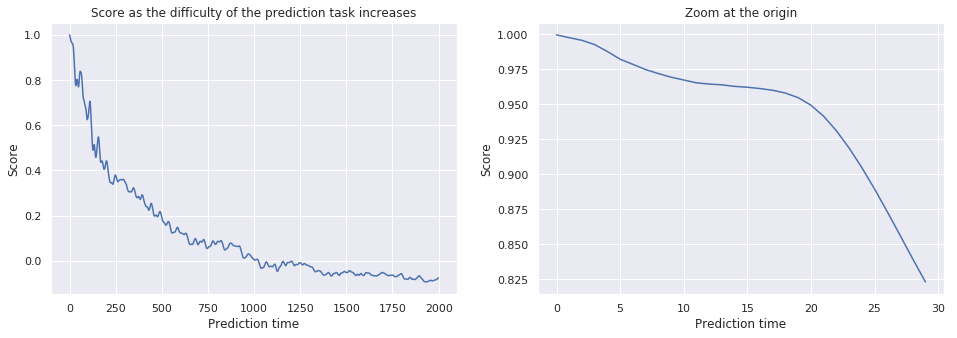

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(valid_score)
ax1.set_title('Score as the difficulty of the prediction task increases')
ax1.set_xlabel('Prediction time')
ax1.set_ylabel('Score')

ax2.plot(valid_score[:30])
ax2.set_title('Zoom at the origin')
ax2.set_xlabel('Prediction time')
ax2.set_ylabel('Score')

## Other tests

In [12]:
pred_output = b.recursive_predict(input_data)

Start of testing...
Initialization finished. Elapsed time:
0.00030612945556640625
100%|██████████| 1000/1000 [00:01<00:00, 970.65it/s]
Iterations finished. Elapsed time:
1.034686803817749
100%|██████████| 10/10 [00:00<00:00, 842.69it/s]
Testing finished. Elapsed time:
1.1459059715270996


In [13]:
pred_output[0, 950:]

array([[ 0.0583169 ],
       [ 0.09206983],
       [ 0.12148979],
       [ 0.14808623],
       [ 0.17212238],
       [ 0.19349036],
       [ 0.213503  ],
       [ 0.23356969],
       [ 0.25232727],
       [ 0.26891068],
       [ 0.28432556],
       [ 0.29788913],
       [ 0.30783488],
       [ 0.31312811],
       [ 0.3113157 ],
       [ 0.29688187],
       [ 0.26520198],
       [ 0.21777324],
       [ 0.16077636],
       [ 0.09972655],
       [ 0.03688969],
       [-0.02671342],
       [-0.08899843],
       [-0.148935  ],
       [-0.20615324],
       [-0.25857283],
       [-0.30681539],
       [-0.35120911],
       [-0.39142294],
       [-0.42706348],
       [-0.45739477],
       [-0.48326746],
       [-0.50430909],
       [-0.51873086],
       [-0.52627776],
       [-0.5261742 ],
       [-0.51560004],
       [-0.48988797],
       [-0.44409883],
       [-0.37713496],
       [-0.29689627],
       [-0.21950397],
       [-0.15830237],
       [-0.11413679],
       [-0.0805696 ],
       [-0